
### Upload the CSV file for customer churning data
Link of dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn




In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn.csv


### Basic Imports

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

### Import dataset

In [122]:
og_df = pd.read_csv("/content/customer_churn.csv")
og_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check imbalance in data

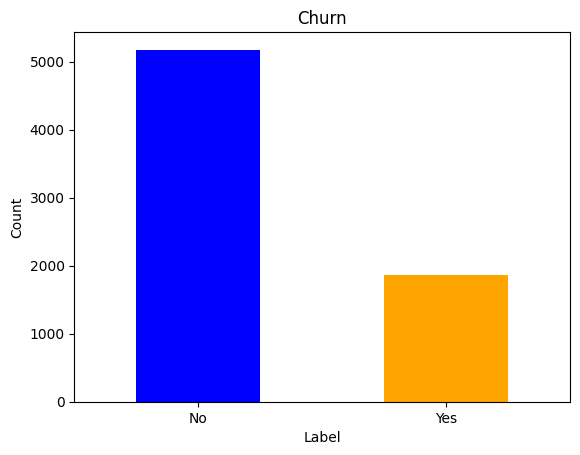

In [123]:
counts = og_df['Churn'].value_counts()

# Plot the counts as a bar chart
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

### Check relation between different features and churn
- bar chart for non-numerical features
- scatter plot for numerical features

\\
###### Here we can infer that gender, total charges, monthly charges and tenure don't seem to affect churn, since the distribution is similar for all values in each of these features.

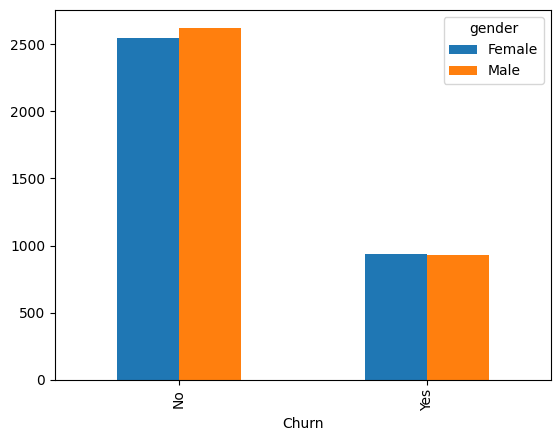

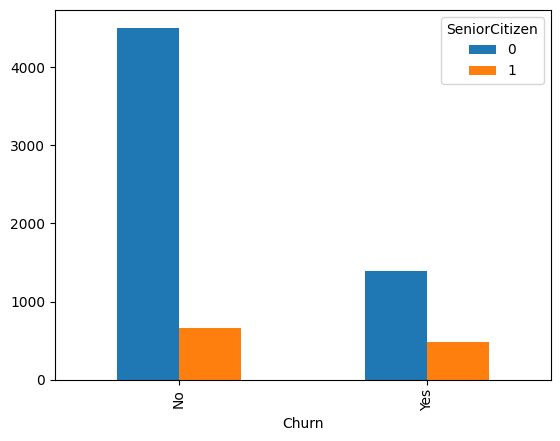

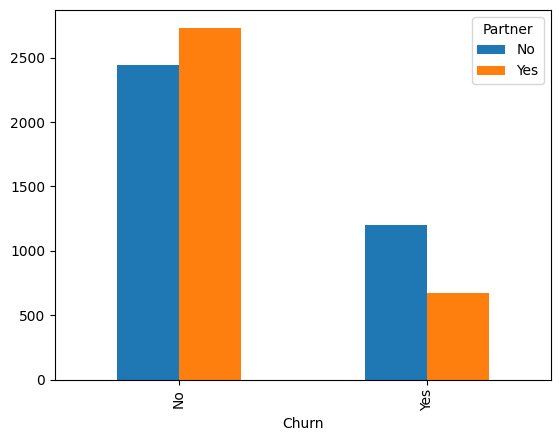

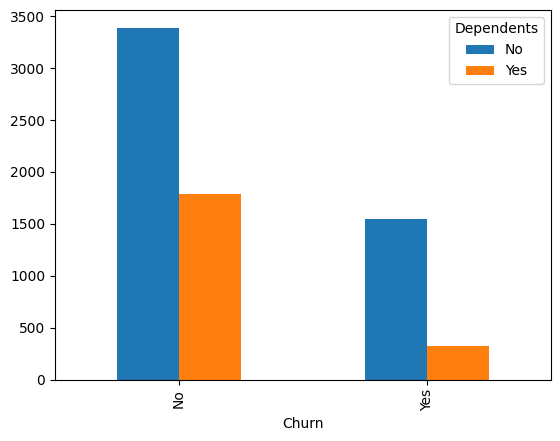

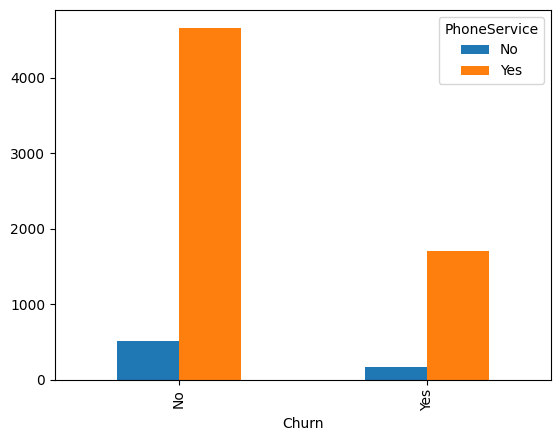

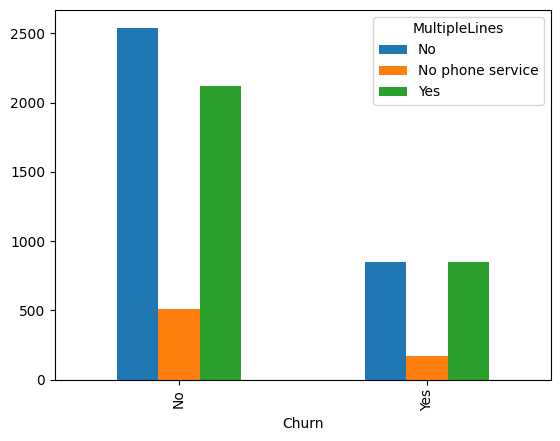

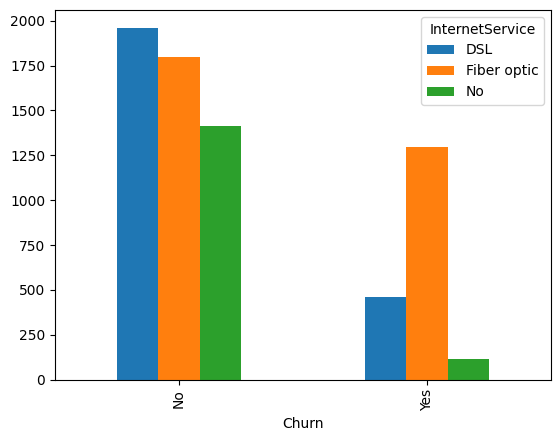

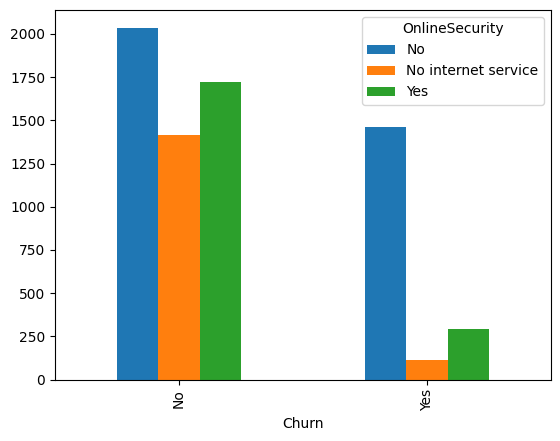

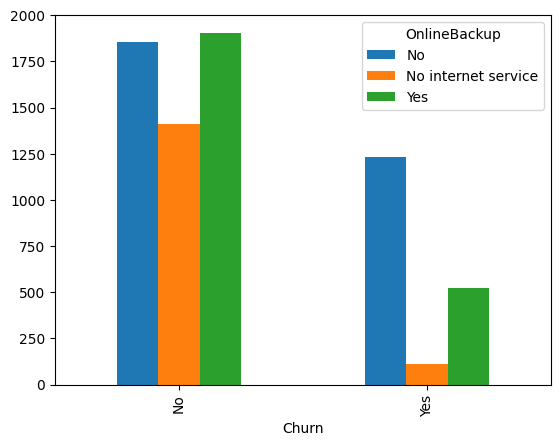

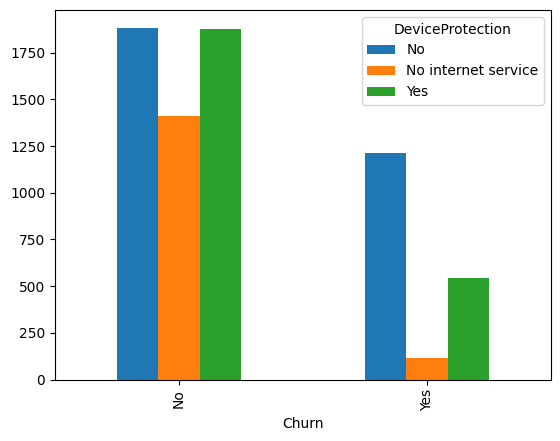

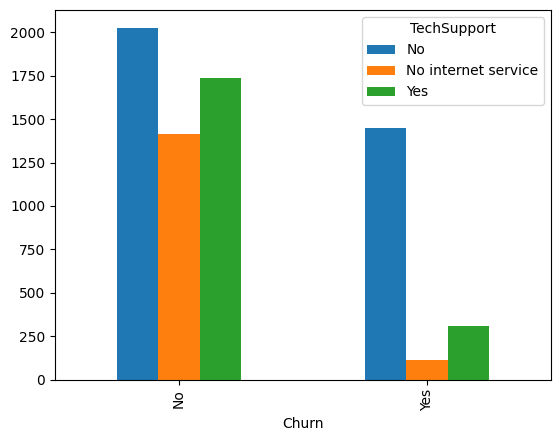

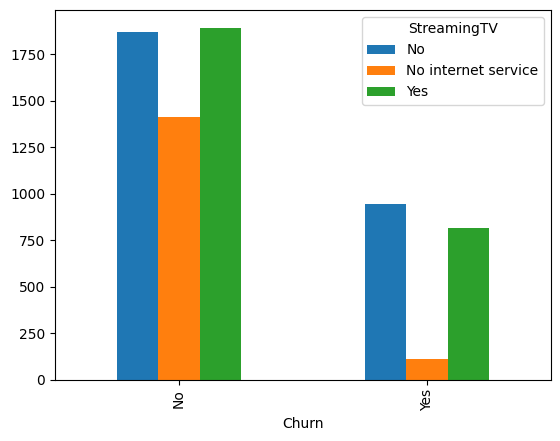

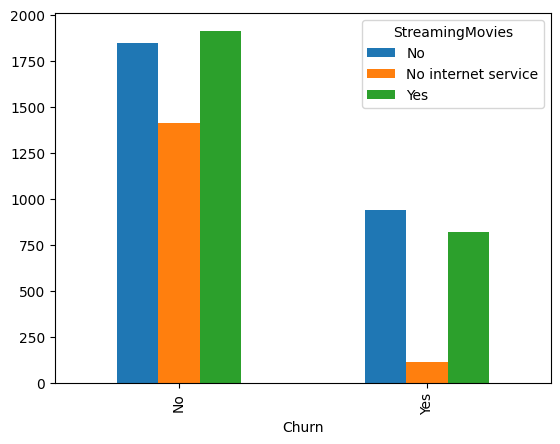

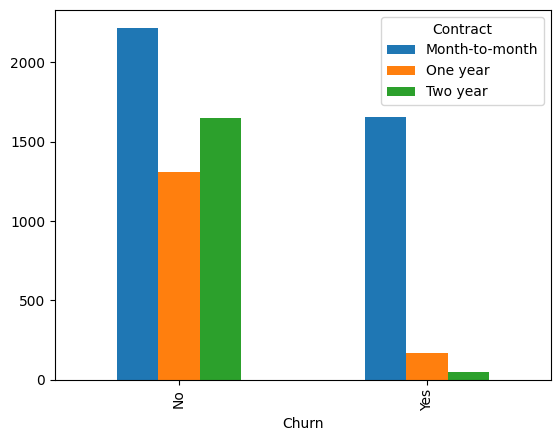

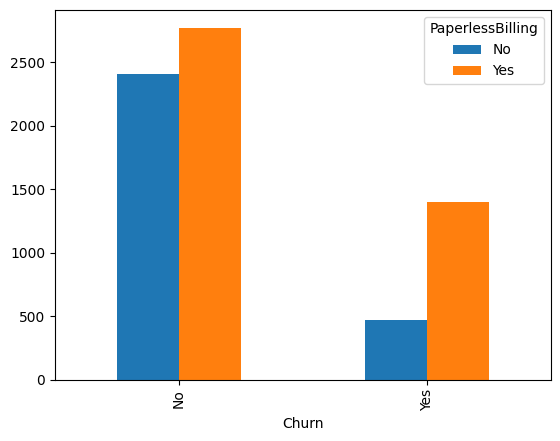

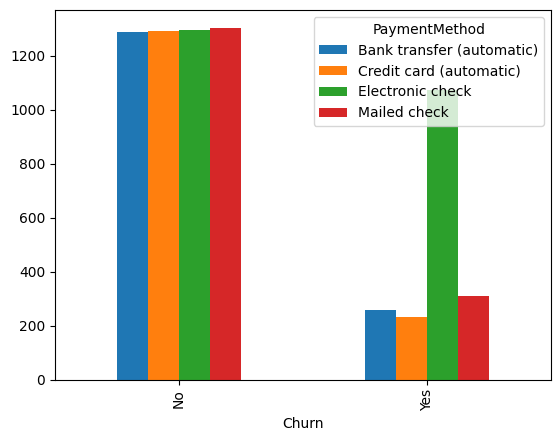

In [124]:
columns = og_df.columns[1:-1]
columns = [col for col in columns if col not in ["TotalCharges", "MonthlyCharges", "tenure"]]

for column in columns:
    pd.crosstab(og_df["Churn"], og_df[column]).plot(kind="bar")


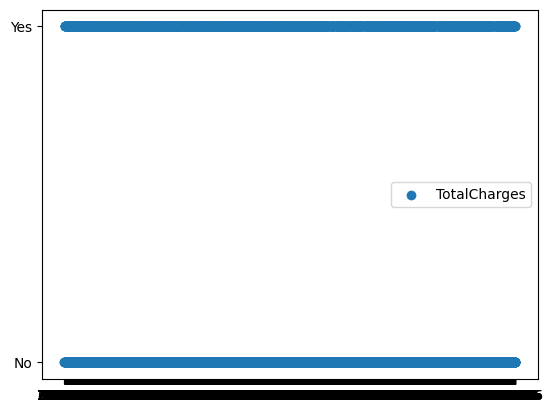

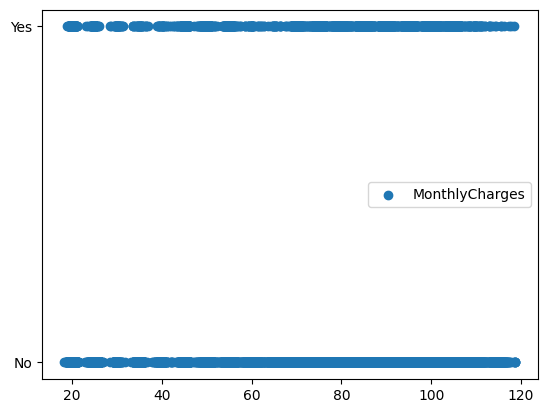

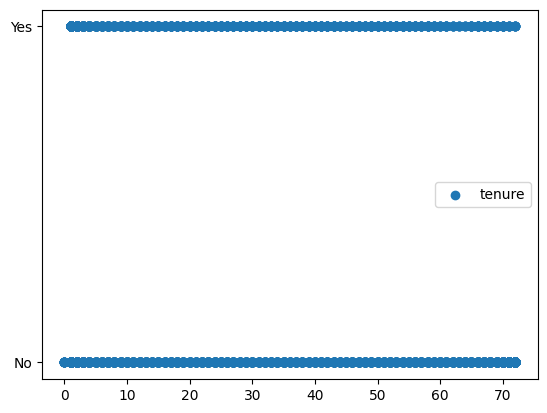

In [125]:
for column in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    plt.scatter(og_df[column], og_df['Churn'], label=column)
    plt.legend()
    plt.show()

### Assign numeric values to non-numeric features

In [126]:
# customer id doesn't affect churn
df = og_df.copy()

In [127]:
df["Partner"]=df["Partner"].replace({"Yes":1,"No":0})
df["Dependents"]=df["Dependents"].replace({"Yes":1,"No":0})
df["PhoneService"]=df["PhoneService"].replace({"Yes":1,"No":0})
df["MultipleLines"]=df["MultipleLines"].replace({"Yes":1,"No":0,"No phone service":-1})
df["InternetService"]=df["InternetService"].replace({"DSL":1,"Fiber optic":2,"No":0})
df["OnlineSecurity"]=df["OnlineSecurity"].replace({"Yes":1,"No":0,"No internet service":-1})
df["OnlineBackup"]=df["OnlineBackup"].replace({"Yes":1,"No":0,"No internet service":-1})
df["DeviceProtection"]=df["DeviceProtection"].replace({"Yes":1,"No":0,"No internet service":-1})
df["TechSupport"]=df["TechSupport"].replace({"Yes":1,"No":0,"No internet service":-1})
df["StreamingTV"]=df["StreamingTV"].replace({"Yes":1,"No":0,"No internet service":-1})
df["StreamingMovies"]=df["StreamingMovies"].replace({"Yes":1,"No":0,"No internet service":-1})
df["PaperlessBilling"]=df["PaperlessBilling"].replace({"Yes":1,"No":0})
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})
df["PaymentMethod"]=df["PaymentMethod"].replace({"Electronic check":1,"Mailed check":2,"Bank transfer (automatic)":3,"Credit card (automatic)":4})
df["Contract"]=df["Contract"].replace({"Month-to-month":1,"One year":2,"Two year":3})

df.drop(columns = ["customerID", "TotalCharges", "MonthlyCharges", "tenure", "gender"], inplace=True)

df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,-1,1,0,1,0,0,0,0,1,1,1,0
1,0,0,0,1,0,1,1,0,1,0,0,0,2,0,2,0
2,0,0,0,1,0,1,1,1,0,0,0,0,1,1,2,1
3,0,0,0,0,-1,1,1,0,1,1,0,0,2,0,3,0
4,0,0,0,1,0,2,0,0,0,0,0,0,1,1,1,1


### Split data into training and test

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Churn"]), df["Churn"], test_size=0.2, random_state=50)

### Apply machine learning
1. `plot_metrics`: plots the comparison among metrics of different models
2. `display_metrics`: calculates the metrics needed for plot_metrics
3. `store_model`: stores the trained model for later use
4. `apply_models`: applies the models on the dataset

In [129]:
def plot_metrics(metrics_df):
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Metrics Across Models')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(title='Models', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

In [130]:
def display_metrics(model_names, accuracy, precision, recall, f1_score):
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

    # Set 'Model' as index
    metrics_df.set_index('Model', inplace=True)

    # Transpose the DataFrame
    metrics_df = metrics_df.T
    display(metrics_df)
    plot_metrics(metrics_df)

In [135]:
from joblib import dump
import os

def store_model(model_name, model):
    model_dir = "/content/saved_models"
    os.makedirs(model_dir, exist_ok=True)

    # Save the trained model
    model_path = os.path.join(model_dir, f"{'_'.join(model_name.split(' '))}_model.joblib")
    dump(model, model_path)
    print(f"{model_name} model saved to {model_path}")

In [136]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def apply_models(models):
    model_names = []
    accuracy = []
    precision = []
    recall = []
    f1_score = []

    # Iterate over each model and pipeline
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        store_model(model_name, model)

        # Calculate metrics
        model_names.append(model_name)
        accuracy.append(accuracy_score(y_test, y_pred))
        prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        precision.append(prec)
        recall.append(rec)
        f1_score.append(f1)

    display_metrics(model_names, accuracy, precision, recall, f1_score)

### Initialize required models

lr model saved to /content/saved_models/lr_model.joblib
rf model saved to /content/saved_models/rf_model.joblib
svc model saved to /content/saved_models/svc_model.joblib
xgb model saved to /content/saved_models/xgb_model.joblib


Model,lr,rf,svc,xgb
Accuracy,0.781405,0.767211,0.794180,0.765082
Precision,0.597403,0.561350,0.651163,0.554572
Recall,0.500000,0.497283,0.456522,0.510870
F1 Score,0.544379,0.527378,0.536741,0.531825


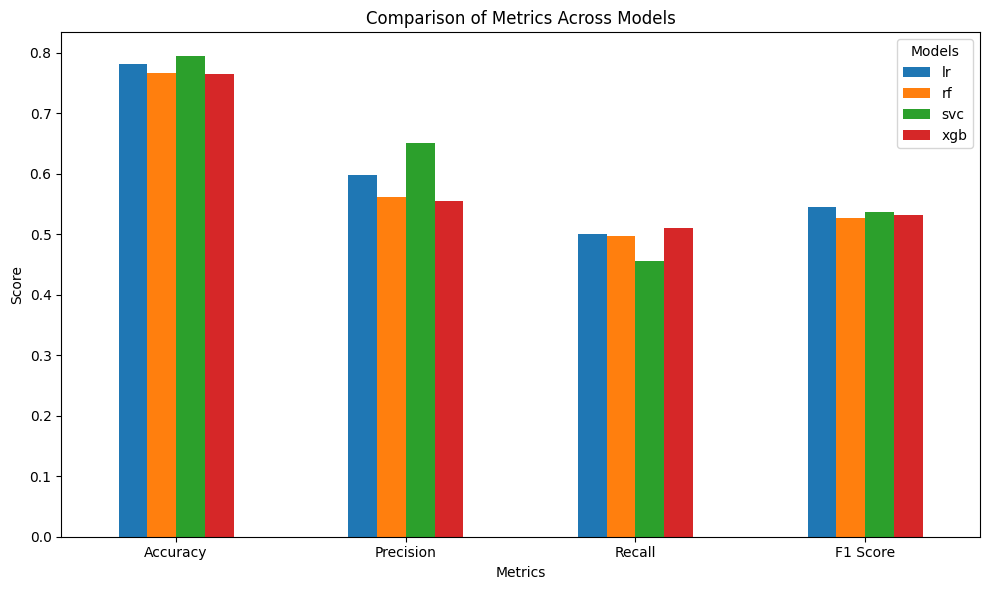

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = [
    ("lr", LogisticRegression()),
    ("rf", RandomForestClassifier()),
    ("svc", SVC(probability=True )),
    ("xgb", XGBClassifier())
]

apply_models(models)

### Ensemble models to combine individual models

vc model saved to /content/saved_models/vc_model.joblib
sc model saved to /content/saved_models/sc_model.joblib


Model,vc,sc
Accuracy,0.787083,0.782115
Precision,0.617241,0.596825
Recall,0.486413,0.510870
F1 Score,0.544073,0.550512


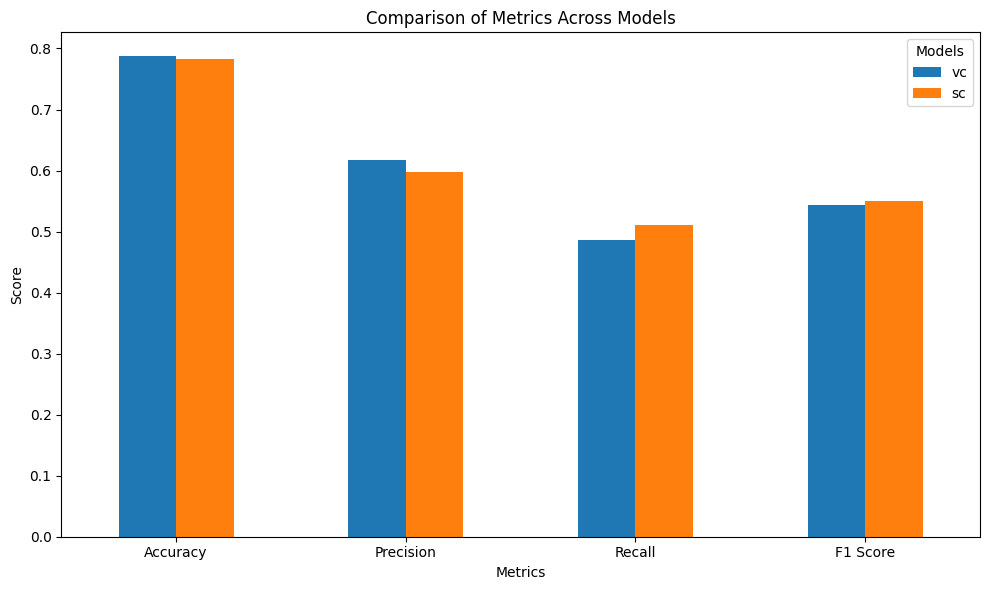

In [134]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

vc = VotingClassifier(estimators=models, voting='soft')
sc = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

ensemble_models = [("vc", vc), ("sc", sc)]
apply_models(ensemble_models)
